In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# 1.1 read data
filename = 'adult.csv'
df = pd.read_csv(filename)
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
print(df.shape)

(32560, 15)


In [4]:
names = list(df.columns)
print(names)

['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']


 <=50K
<=50K    24719
>50K      7841
Name: count, dtype: int64


<Axes: xlabel=' <=50K'>

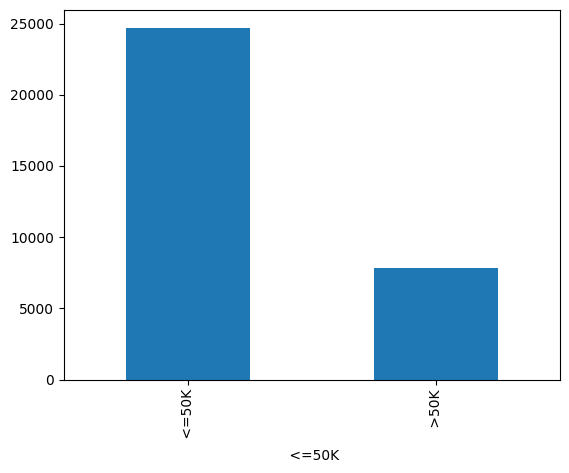

In [5]:
g = df[names[-1]].value_counts()
print(g)
g.plot.bar()

In [6]:
types = df.dtypes
print(types)

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
types = df.dtypes
names = list(df.columns)
for i in range(len(types)):
    if types[i] == 'object':
        df[names[i]] = le.fit_transform(df[names[i]])

C:\Users\TOSHIBA R63\AppData\Local\Temp\ipykernel_18056\2056027129.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i] == 'object':
C:\Users\TOSHIBA R63\AppData\Local\Temp\ipykernel_18056\2056027129.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i] == 'object':
C:\Users\TOSHIBA R63\AppData\Local\Temp\ipykernel_18056\2056027129.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i] == 'object':
C:\U

In [8]:
data = df.values
print(data[:2])

[[    50      6  83311      9     13      2      4      0      4      1
       0      0     13     39      0]
 [    38      4 215646     11      9      0      6      1      4      1
       0      0     40     39      0]]


In [9]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32560, 14)
(32560,)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
 0.28571429 0.         1.         1.         0.         0.
 0.12244898 0.95121951]


In [11]:
from sklearn.model_selection import train_test_split

# Split features and labels
X = df.values[:, :-1]
y = df.values[:, -1]

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (26048, 14)
Testing set size: (6512, 14)


In [12]:
print(len(y_test))

6512


In [13]:
from sklearn.neighbors import KNeighborsClassifier
#kNN = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
kNN = KNeighborsClassifier(n_neighbors=3)

kNN.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = kNN.predict(X_test)# predict

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4386  526]
 [ 703  897]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4912
           1       0.63      0.56      0.59      1600

    accuracy                           0.81      6512
   macro avg       0.75      0.73      0.74      6512
weighted avg       0.80      0.81      0.81      6512



In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
# prediction
y_predict = kNN.predict(X_test)

In [17]:
error = 0
for i in range(len(X_test)):
  #print(y_test[i],y_predict[i])
  if y_test[i] != y_predict[i]:
    error += 1
print(error)

1229


In [18]:
# Define sigmoid and loss funcs
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, weights, bias):
    m = len(y)
    h = sigmoid(X @ weights + bias)
    loss = -1/m * (y @ np.log(h + 1e-10) + (1 - y) @ np.log(1 - h + 1e-10))
    return loss

# Class Gradient Descent Optimizer
class GradientDescentOptimizer:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.loss_history = []

    # Batch Gradient Descent
    def batch_gd(self, X, y):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0

        for epoch in range(self.epochs):
            h = sigmoid(X @ weights + bias)
            dw = 1/m * X.T @ (h - y)
            db = 1/m * np.sum(h - y)

            weights -= self.learning_rate * dw
            bias -= self.learning_rate * db

            loss = compute_loss(X, y, weights, bias)
            self.loss_history.append(loss)

        return weights, bias

    # Stochastic Gradient Descent
    def stochastic_gd(self, X, y):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0

        for epoch in range(self.epochs):
            for i in range(m):
                idx = np.random.randint(0, m)
                xi = X[idx:idx+1]
                yi = y[idx:idx+1]

                h = sigmoid(xi @ weights + bias)
                dw = xi.T @ (h - yi)
                db = np.sum(h - yi)

                weights -= self.learning_rate * dw
                bias -= self.learning_rate * db

            loss = compute_loss(X, y, weights, bias)
            self.loss_history.append(loss)

        return weights, bias

    # Mini-Batch Gradient Descent
    def mini_batch_gd(self, X, y, batch_size=32):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0

        for epoch in range(self.epochs):
            indices = np.random.permutation(m)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]

                h = sigmoid(xi @ weights + bias)
                dw = 1/len(yi) * xi.T @ (h - yi)
                db = 1/len(yi) * np.sum(h - yi)

                weights -= self.learning_rate * dw
                bias -= self.learning_rate * db

            loss = compute_loss(X, y, weights, bias)
            self.loss_history.append(loss)

        return weights, bias

    # Momentum
    def momentum(self, X, y, gamma=0.9):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0
        v_w = np.zeros(n)
        v_b = 0

        for epoch in range(self.epochs):
            h = sigmoid(X @ weights + bias)
            dw = 1/m * X.T @ (h - y)
            db = 1/m * np.sum(h - y)

            v_w = gamma * v_w - self.learning_rate * dw
            v_b = gamma * v_b - self.learning_rate * db

            weights += v_w
            bias += v_b

            loss = compute_loss(X, y, weights, bias)
            self.loss_history.append(loss)

        return weights, bias

    # RMSprop
    def rmsprop(self, X, y, rho=0.9, epsilon=1e-8):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0
        e_w = np.zeros(n)
        e_b = 0

        for epoch in range(self.epochs):
            h = sigmoid(X @ weights + bias)
            dw = 1/m * X.T @ (h - y)
            db = 1/m * np.sum(h - y)

            e_w = rho * e_w + (1 - rho) * (dw ** 2)
            e_b = rho * e_b + (1 - rho) * (db ** 2)

            weights -= self.learning_rate * dw / (np.sqrt(e_w) + epsilon)
            bias -= self.learning_rate * db / (np.sqrt(e_b) + epsilon)

            loss = compute_loss(X, y, weights, bias)
            self.loss_history.append(loss)

        return weights, bias

    # Adam Optimizer
    def adam(self, X, y, beta1=0.9, beta2=0.999, epsilon=1e-8):
        m, n = X.shape
        weights = np.zeros(n)
        bias = 0
        m_w, m_b = np.zeros(n), 0
        v_w, v_b = np.zeros(n), 0
        t = 0

        for epoch in range(self.epochs):
            t += 1
            h = sigmoid(X @ weights + bias)
            dw = 1/m * X.T @ (h - y)
            db = 1/m * np.sum(h - y)

            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

            m_w_hat = m_w / (1 - beta1 ** t)
            m_b_hat = m_b / (1 - beta1 ** t)
            v_w_hat = v_w / (1 - beta2 ** t)
            v_b_hat = v_b / (1 - beta2 ** t)

            weights -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
            bias -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

            loss = compute_loss(X, y, weights, bias)
            self.loss_history.append(loss)

        return weights, bias

# Predict func
def predict(X, weights, bias):
    h = sigmoid(X @ weights + bias)
    return (h >= 0.5).astype(int)

# Accuracy caculate
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [19]:
# Initialize optimizers
optimizers = {
    'Batch GD': GradientDescentOptimizer(learning_rate=0.1, epochs=200),
    'Stochastic GD': GradientDescentOptimizer(learning_rate=0.01, epochs=200),
    'Mini-Batch GD': GradientDescentOptimizer(learning_rate=0.1, epochs=200),
    'Momentum': GradientDescentOptimizer(learning_rate=0.1, epochs=200),
    'RMSprop': GradientDescentOptimizer(learning_rate=0.01, epochs=200),
    'Adam': GradientDescentOptimizer(learning_rate=0.001, epochs=200)
}

In [20]:
# Train Batch Gradient Descent
print("Training with Batch GD...")
optimizer_batch = optimizers['Batch GD']
weights_batch, bias_batch = optimizer_batch.batch_gd(X_train, y_train)
y_pred_batch = predict(X_test, weights_batch, bias_batch)
acc_batch = accuracy(y_test, y_pred_batch)
print(f"Accuracy with Batch GD: {acc_batch:.4f}")
print(confusion_matrix(y_test, y_pred_batch))
print(classification_report(y_test, y_pred_batch))

Training with Batch GD...
Accuracy with Batch GD: 0.7543
[[4912    0]
 [1600    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4912
           1       0.00      0.00      0.00      1600

    accuracy                           0.75      6512
   macro avg       0.38      0.50      0.43      6512
weighted avg       0.57      0.75      0.65      6512



c:\Users\TOSHIBA R63\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TOSHIBA R63\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TOSHIBA R63\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [21]:
# Train Stochastic Gradient Descent
print("Training with Stochastic GD...")
optimizer_sgd = optimizers['Stochastic GD']
weights_sgd, bias_sgd = optimizer_sgd.stochastic_gd(X_train, y_train)
y_pred_sgd = predict(X_test, weights_sgd, bias_sgd)
acc_sgd = accuracy(y_test, y_pred_sgd)
print(f"Accuracy with Stochastic GD: {acc_sgd:.4f}")
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

Training with Stochastic GD...
Accuracy with Stochastic GD: 0.8188
[[4590  322]
 [ 858  742]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4912
           1       0.70      0.46      0.56      1600

    accuracy                           0.82      6512
   macro avg       0.77      0.70      0.72      6512
weighted avg       0.81      0.82      0.81      6512



In [22]:
# Train Mini-Batch Gradient Descent
print("Training with Mini-Batch GD...")
optimizer_minibatch = optimizers['Mini-Batch GD']
weights_minibatch, bias_minibatch = optimizer_minibatch.mini_batch_gd(X_train, y_train)
y_pred_minibatch = predict(X_test, weights_minibatch, bias_minibatch)
acc_minibatch = accuracy(y_test, y_pred_minibatch)
print(f"Accuracy with Mini-Batch GD: {acc_minibatch:.4f}")
print(confusion_matrix(y_test, y_pred_minibatch))
print(classification_report(y_test, y_pred_minibatch))

Training with Mini-Batch GD...
Accuracy with Mini-Batch GD: 0.8153
[[4646  266]
 [ 937  663]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4912
           1       0.71      0.41      0.52      1600

    accuracy                           0.82      6512
   macro avg       0.77      0.68      0.70      6512
weighted avg       0.80      0.82      0.80      6512



In [23]:
# Train Momentum
print("Training with Momentum...")
optimizer_momentum = optimizers['Momentum']
weights_momentum, bias_momentum = optimizer_momentum.momentum(X_train, y_train)
y_pred_momentum = predict(X_test, weights_momentum, bias_momentum)
acc_momentum = accuracy(y_test, y_pred_momentum)
print(f"Accuracy with Momentum: {acc_momentum:.4f}")
print(confusion_matrix(y_test, y_pred_momentum))
print(classification_report(y_test, y_pred_momentum))

Training with Momentum...
Accuracy with Momentum: 0.7910
[[4751  161]
 [1200  400]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      4912
           1       0.71      0.25      0.37      1600

    accuracy                           0.79      6512
   macro avg       0.76      0.61      0.62      6512
weighted avg       0.78      0.79      0.75      6512



In [24]:
# Train RMSprop
print("Training with RMSprop...")
optimizer_rmsprop = optimizers['RMSprop']
weights_rmsprop, bias_rmsprop = optimizer_rmsprop.rmsprop(X_train, y_train)
y_pred_rmsprop = predict(X_test, weights_rmsprop, bias_rmsprop)
acc_rmsprop = accuracy(y_test, y_pred_rmsprop)
print(f"Accuracy with RMSprop: {acc_rmsprop:.4f}")
print(confusion_matrix(y_test, y_pred_rmsprop))
print(classification_report(y_test, y_pred_rmsprop))

Training with RMSprop...
Accuracy with RMSprop: 0.7865
[[4735  177]
 [1213  387]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4912
           1       0.69      0.24      0.36      1600

    accuracy                           0.79      6512
   macro avg       0.74      0.60      0.61      6512
weighted avg       0.77      0.79      0.75      6512



In [25]:
# Train Adam Optimizer
print("Training with Adam...")
optimizer_adam = optimizers['Adam']
weights_adam, bias_adam = optimizer_adam.adam(X_train, y_train)
y_pred_adam = predict(X_test, weights_adam, bias_adam)
acc_adam = accuracy(y_test, y_pred_adam)
print(f"Accuracy with Adam: {acc_adam:.4f}")
print(confusion_matrix(y_test, y_pred_adam))
print(classification_report(y_test, y_pred_adam))

Training with Adam...
Accuracy with Adam: 0.7543
[[4912    0]
 [1600    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4912
           1       0.00      0.00      0.00      1600

    accuracy                           0.75      6512
   macro avg       0.38      0.50      0.43      6512
weighted avg       0.57      0.75      0.65      6512



c:\Users\TOSHIBA R63\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TOSHIBA R63\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TOSHIBA R63\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

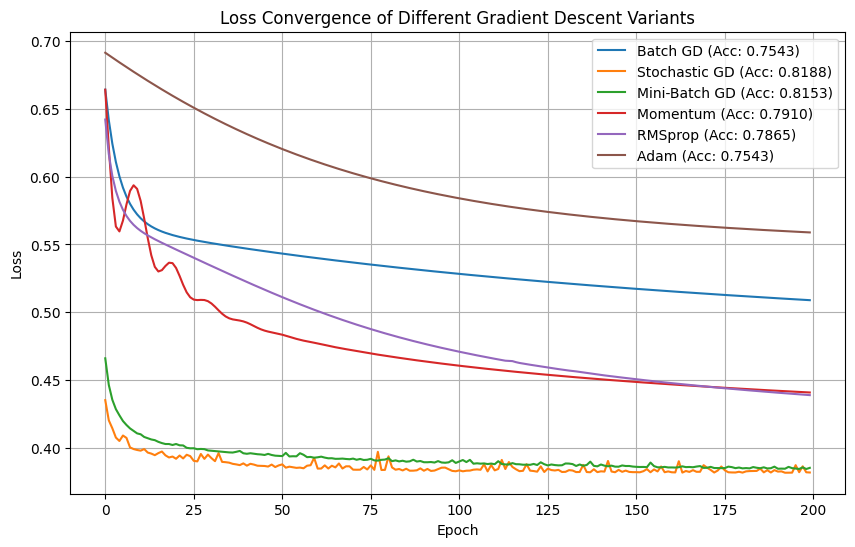

In [26]:
# Loss convergence
plt.figure(figsize=(10, 6))
plt.plot(optimizers['Batch GD'].loss_history, label=f"Batch GD (Acc: {acc_batch:.4f})")
plt.plot(optimizers['Stochastic GD'].loss_history, label=f"Stochastic GD (Acc: {acc_sgd:.4f})")
plt.plot(optimizers['Mini-Batch GD'].loss_history, label=f"Mini-Batch GD (Acc: {acc_minibatch:.4f})")
plt.plot(optimizers['Momentum'].loss_history, label=f"Momentum (Acc: {acc_momentum:.4f})")
plt.plot(optimizers['RMSprop'].loss_history, label=f"RMSprop (Acc: {acc_rmsprop:.4f})")
plt.plot(optimizers['Adam'].loss_history, label=f"Adam (Acc: {acc_adam:.4f})")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Convergence of Different Gradient Descent Variants')
plt.legend()
plt.grid()
plt.show()